### Polynomial Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read comma separated data
path = "./data.txt"
data = np.loadtxt(path, delimiter=',')
X, Y = data[:, 0], data[:, 1]

Using vectorized approach instead of explicit loops because:
- concise
- fast
- optimized underlying numpy operations

The cost is 32.072733877455676
[0.01543341 0.0874023  0.05184844]


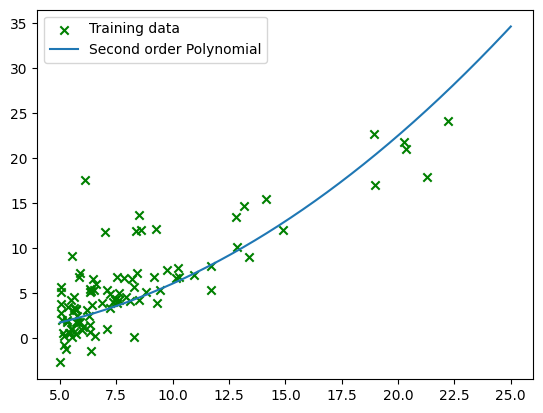

In [11]:
def computeCostVectorize(X, y, theta):
    m = y.size
    J = 0
    h = np.dot(X, theta)
    J = np.sum((h-y)**2)/(2*m)
    return J

def gradientDescentVectorize(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = np.dot(X, theta)  # Compute the hypothesis for all training examples
        
        # Update theta for all parameters simultaneously
        gradient = np.dot(X.T, (h - y) ) / m
        theta = theta - alpha * gradient
        
        # Save the cost in every iteration
        J_history.append(computeCostVectorize(X, y, theta))
    
    return theta, J_history

X, Y = data[:, 0], data[:, 1]    
m=len(data)
X=np.stack([np.ones(m),X, np.power(X,2)],axis=1)

cost= computeCostVectorize(X, Y, theta=np.array([0.0, 0.0,0.0]))
print("The cost is",cost )

theta_2 = np.zeros(3)

# some gradient descent settings
iterations = 1500
alpha = 0.00001

theta_2, J_history = gradientDescentVectorize(X ,Y, theta_2, alpha, iterations) 
print(theta_2)
# plot the 2nd Order fit
plt.scatter(X[:, 1],Y, marker = 'x', color = 'green')
p = np.linspace(5, 25, 1000)
p=np.stack([np.ones(1000),p, np.power(p,2)],axis=1)

plt.plot(p[:, 1], np.dot(p, theta_2))  
plt.legend(['Training data', 'Second order Polynomial']);

Fitting third Order Polynomial through same dataset.

The cost is 32.072733877455676
[4.39699139e-05 3.13552441e-04 1.95039396e-03 2.74156825e-03]


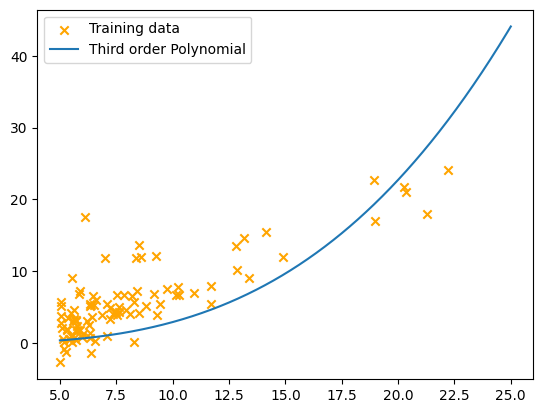

In [14]:
X, Y = data[:, 0], data[:, 1]
m=len(data)

X=np.stack([np.ones(m),X, np.power(X,2),np.power(X,3)],axis=1)

cost= computeCostVectorize(X, Y, theta=np.array([0.0, 0.0,0.0,0.0]))
print("The cost is",cost )

theta_3 = np.zeros(4)

# some gradient descent settings
iterations = 1500
alpha = 0.00000001

theta_3, J_history = gradientDescentVectorize(X ,Y, theta_3, alpha, iterations) 
print(theta_3)
# plot the 3rd order polynomial fit
plt.scatter(X[:, 1],Y, marker = 'x', color = 'orange')

p = np.linspace(5, 25, 1000)
p=np.stack([np.ones(1000),p, np.power(p,2),np.power(p,3)],axis=1)

plt.plot(p[:, 1], np.dot(p, theta_3)) 

plt.legend(['Training data', 'Third order Polynomial'])